In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random

In [2]:
#read in the data

chicago_data = pd.read_csv("chicago_2017.csv")
chicago_weather = pd.read_csv("weather_hourly_chicago.csv")

**Some Information about the data set**

In [3]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829014 entries, 0 to 3829013
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 233.7+ MB


In [4]:
chicago_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43790 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [5]:
#chicago_data.describe()

In [6]:
chicago_data.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,3/31/2017 23:59:07,4/1/2017 00:13:24,66,171,Clinton St & Lake St,May St & Cullerton St,5292,Subscriber
1,3/31/2017 23:56:25,4/1/2017 00:00:21,199,26,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,4408,Subscriber
2,3/31/2017 23:55:33,4/1/2017 00:01:21,520,432,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,696,Subscriber
3,3/31/2017 23:54:46,3/31/2017 23:59:34,110,142,Dearborn St & Erie St,McClurg Ct & Erie St,4915,Subscriber
4,3/31/2017 23:53:33,4/1/2017 00:00:28,327,331,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),4247,Subscriber
5,3/31/2017 23:51:17,3/31/2017 23:55:19,143,289,Sedgwick St & Webster Ave,Wells St & Concord Ln,3536,Subscriber
6,3/31/2017 23:51:16,3/31/2017 23:57:17,81,41,Daley Center Plaza,Federal St & Polk St,5111,Subscriber
7,3/31/2017 23:50:26,3/31/2017 23:56:20,56,77,Desplaines St & Kinzie St,Clinton St & Madison St,1579,Subscriber
8,3/31/2017 23:50:25,3/31/2017 23:55:24,210,69,Ashland Ave & Division St,Damen Ave & Pierce Ave,3914,Subscriber
9,3/31/2017 23:49:58,4/1/2017 00:09:31,117,29,Wilton Ave & Belmont Ave,Noble St & Milwaukee Ave,5455,Subscriber


**No missing data** --> all parametes have 3 829 014 values

In [7]:
chicago_data['start_time']= pd.to_datetime(chicago_data['start_time'])

In [8]:
chicago_data['end_time'] = pd.to_datetime(chicago_data['end_time'])

In [143]:
chicago_data['time_delta'] = (chicago_data['end_time']-chicago_data['start_time'])

In [10]:
chicago_data.sort_values(['start_time'], inplace = True)

In [88]:
chicago_data.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,travel_delta,Weekday,Hour,Date
431690,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0 days 00:05:56,6,0,2017-01-01
431689,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0 days 00:05:27,6,0,2017-01-01
431688,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0 days 00:12:25,6,0,2017-01-01
431687,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0 days 00:05:23,6,0,2017-01-01
431686,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0 days 00:12:56,6,0,2017-01-01
431685,2017-01-01 00:10:44,2017-01-01 00:21:27,47,175,State St & Kinzie St,Wells St & Polk St,670,Subscriber,0 days 00:10:43,6,0,2017-01-01
431684,2017-01-01 00:11:34,2017-01-01 00:23:47,194,68,Wabash Ave & Wacker Pl,Clinton St & Tilden St,1145,Subscriber,0 days 00:12:13,6,0,2017-01-01
431683,2017-01-01 00:14:57,2017-01-01 00:26:22,81,191,Daley Center Plaza,Canal St & Monroe St (*),4282,Customer,0 days 00:11:25,6,0,2017-01-01
431682,2017-01-01 00:15:03,2017-01-01 00:26:28,81,191,Daley Center Plaza,Canal St & Monroe St (*),2220,Customer,0 days 00:11:25,6,0,2017-01-01
431681,2017-01-01 00:17:01,2017-01-01 00:29:49,60,54,Dayton St & North Ave,Ogden Ave & Chicago Ave,5258,Customer,0 days 00:12:48,6,0,2017-01-01


In [12]:
number_bikes = len(chicago_data['bike_id'].unique())
print("The overall number of bikes is {}".format(number_bikes))

The overall number of bikes is 6243


In [13]:
def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour

In [14]:
chicago_data["Weekday"] = chicago_data['start_time'].apply(lambda x: get_weekday(x))

In [15]:
chicago_data["Hour"] = chicago_data['start_time'].apply(lambda x: get_hour(x))

In [16]:
chicago_data["Date"] = chicago_data['start_time'].apply(lambda x: get_date(x))

# Weather

In [17]:
chicago_weather.head(10)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.7,-1.7,0.0
1,2015-01-02 02:00:00,-2.2,-2.2,0.0
2,2015-01-02 03:00:00,-2.8,-2.8,0.0
3,2015-01-02 04:00:00,-3.3,-3.3,0.0
4,2015-01-02 05:00:00,-4.4,-4.4,0.0
5,2015-01-02 06:00:00,-5.0,-5.0,0.0
6,2015-01-01 07:00:00,-8.3,-8.3,0.0
7,2015-01-01 08:00:00,-8.9,-8.9,0.0
8,2015-01-01 09:00:00,-8.9,-8.9,0.0
9,2015-01-01 10:00:00,-9.4,-9.4,0.0


In [53]:
chicago_weather['date_time']= pd.to_datetime(chicago_weather['date_time'])

chicago_weather["Date"] = chicago_weather['date_time'].apply(lambda x: get_date(x))

In [50]:
chicago_data.tail(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,travel_delta,Weekday,Hour,Date
3159779,2017-12-31 23:42:00,2017-12-31 23:47:00,240,245,Sheridan Rd & Irving Park Rd,Clarendon Ave & Junior Ter,5353,Subscriber,0 days 00:05:00,6,23,2017-12-31
3159778,2017-12-31 23:48:00,2017-12-31 23:53:00,340,143,Clark St & Wrightwood Ave,Sedgwick St & Webster Ave,5667,Subscriber,0 days 00:05:00,6,23,2017-12-31
3159776,2017-12-31 23:54:00,2018-01-01 00:18:00,145,145,Mies van der Rohe Way & Chestnut St,Mies van der Rohe Way & Chestnut St,5975,Customer,0 days 00:24:00,6,23,2017-12-31
3159777,2017-12-31 23:54:00,2018-01-01 00:18:00,145,145,Mies van der Rohe Way & Chestnut St,Mies van der Rohe Way & Chestnut St,4906,Customer,0 days 00:24:00,6,23,2017-12-31
3159775,2017-12-31 23:58:00,2018-01-01 00:03:00,159,69,Claremont Ave & Hirsch St,Damen Ave & Pierce Ave,3304,Subscriber,0 days 00:05:00,6,23,2017-12-31


In [49]:
chicago_data.index

Int64Index([ 431690,  431689,  431688,  431687,  431686,  431685,  431684,
             431683,  431682,  431681,
            ...
            3159784, 3159783, 3159782, 3159781, 3159780, 3159779, 3159778,
            3159776, 3159777, 3159775],
           dtype='int64', length=3829014)

In [68]:
first_date = chicago_data.iloc[0]['Date']
last_date = chicago_data.iloc[3829013]['Date']

chicago_weather_2017 = chicago_weather[(chicago_weather['Date'] >= first_date) & (chicago_weather['Date'] <= last_date)]

chicago_weather_2017.sort_values(['date_time'], inplace = True)

chicago_weather_2017.head(25)

<ipython-input-68-0237f8d1778f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017.sort_values(['date_time'], inplace = True)


,date_time,max_temp,min_temp,precip,Date
17543,2017-01-01 00:00:00,-0.6,-0.6,0.0,2017-01-01
17520,2017-01-01 01:00:00,-2.2,-2.2,0.0,2017-01-01
17521,2017-01-01 02:00:00,-2.8,-2.8,0.0,2017-01-01
17522,2017-01-01 03:00:00,-3.3,-3.3,0.0,2017-01-01
17523,2017-01-01 04:00:00,-3.3,-3.3,0.0,2017-01-01
17524,2017-01-01 05:00:00,-3.9,-3.9,0.0,2017-01-01
17525,2017-01-01 06:00:00,-4.4,-4.4,0.0,2017-01-01
17550,2017-01-01 07:00:00,-5.0,-5.0,0.0,2017-01-01
17551,2017-01-01 08:00:00,-6.1,-6.1,0.0,2017-01-01
17552,2017-01-01 09:00:00,-6.1,-6.1,0.0,2017-01-01


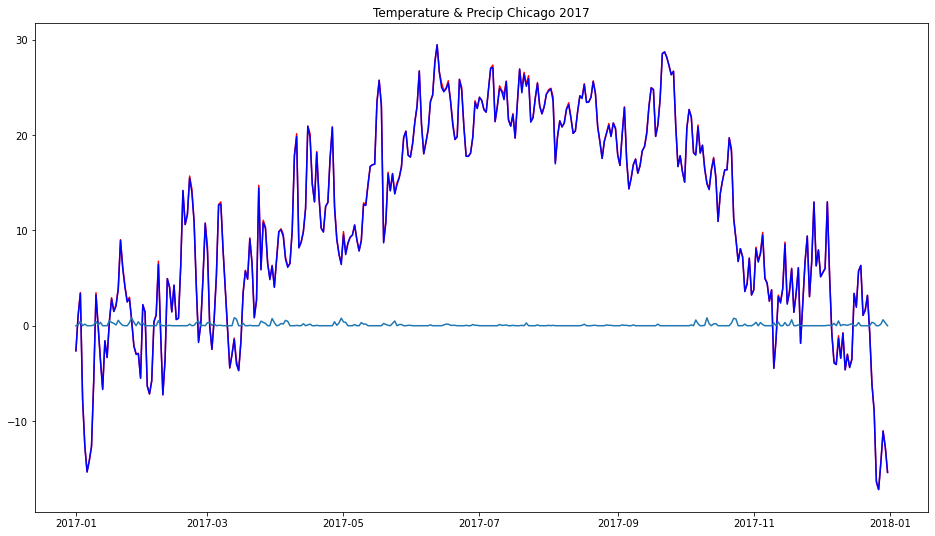

In [146]:
chicago_weather_AvMaxTemp_daily = chicago_weather_2017.groupby('Date')['max_temp'].mean()
chicago_weather_AvMinTemp_daily = chicago_weather_2017.groupby('Date')['min_temp'].mean()
chicago_weather_precip_daily = chicago_weather_2017.groupby('Date')['precip'].mean()

fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_AvMaxTemp_daily, 'r-')
ax.plot(chicago_weather_AvMinTemp_daily, 'b-')
ax.plot(chicago_weather_precip_daily)


ax.set_title('Temperature & Precip Chicago 2017')

plt.show()

# Bike Usage

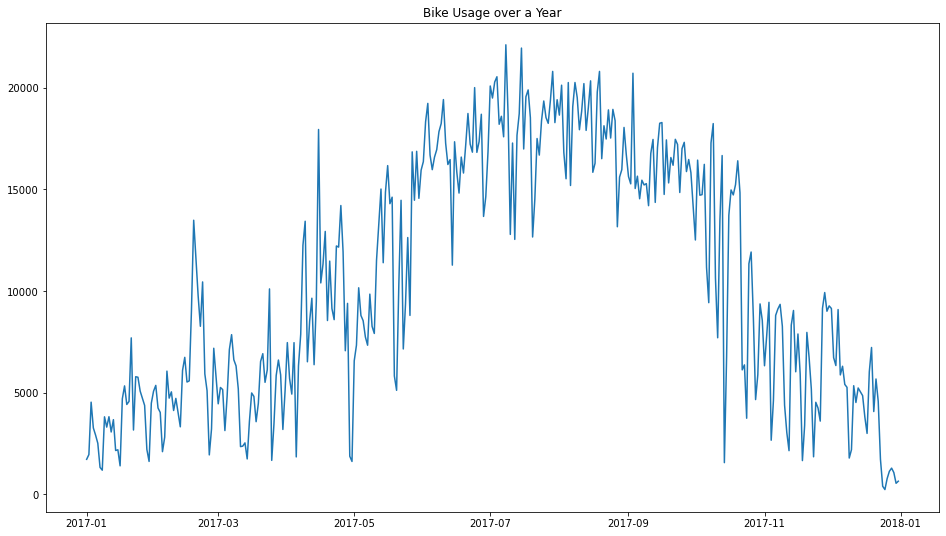

In [90]:
chicago_data_Date_avail = chicago_data.groupby('Date')['bike_id'].count()
chicago_data_Date_avail = pd.DataFrame(chicago_data_Date_avail)

fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_Date_avail)

ax.set_title('Bike Usage over a Year')
plt.show()

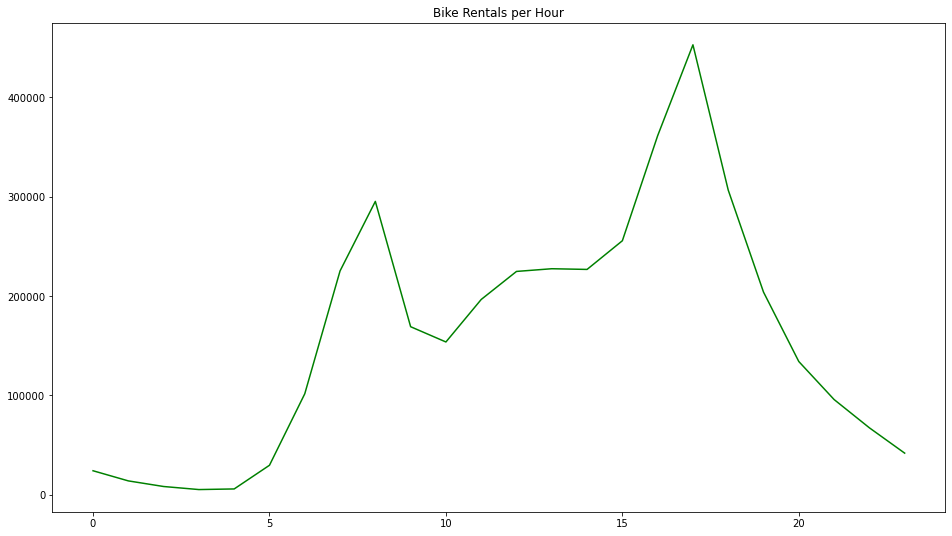

In [99]:
chicago_data_Hour_avail = chicago_data.groupby(['Hour'])['bike_id'].count()
chicago_data_Hour_avail = pd.DataFrame(chicago_data_Hour_avail)

fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_Hour_avail, 'g-')

ax.set_title('Bike Rentals per Hour')
plt.show()

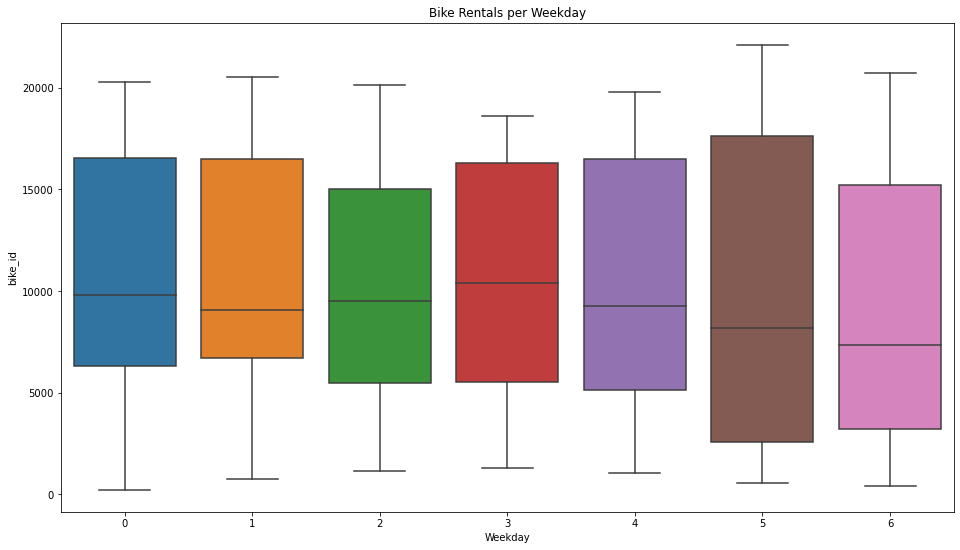

In [95]:
chicago_data_Weekday_avail = chicago_data.groupby(['Date', 'Weekday'])['bike_id'].count()
chicago_data_Weekday_avail = pd.DataFrame(chicago_data_Weekday_avail)

fig, ax = plt.subplots(figsize = (16,9))

sns.boxplot(x = chicago_data_Weekday_avail.index.get_level_values('Weekday'), y =chicago_data_Weekday_avail['bike_id'], ax = ax)

ax.set_title('Bike Rentals per Weekday')
plt.show()

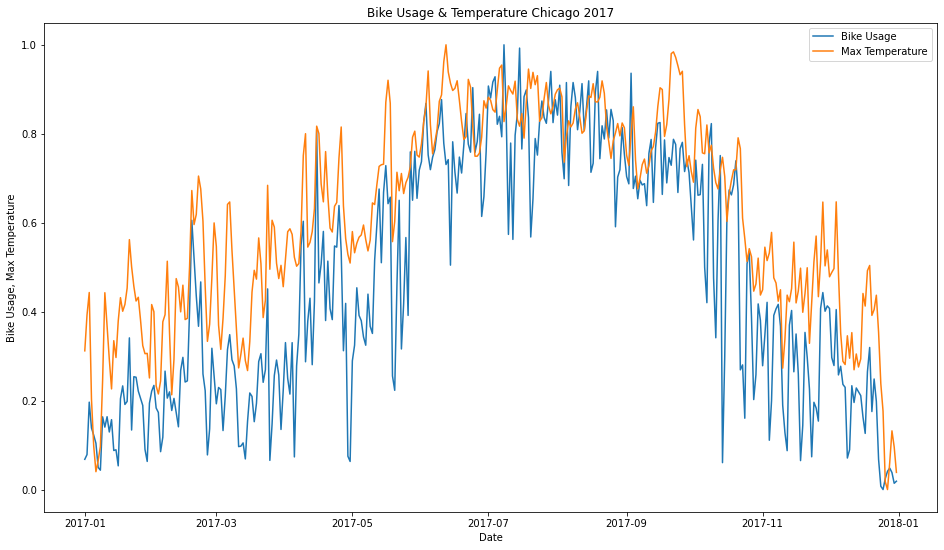

In [148]:
fig, ax = plt.subplots(figsize = (16,9))

chicago_data_Date_avail_rescaled = (chicago_data_Date_avail-chicago_data_Date_avail.min())/(chicago_data_Date_avail.max()-chicago_data_Date_avail.min())
chicago_weather_AvMaxTemp_daily_rescaled = (chicago_weather_AvMaxTemp_daily-chicago_weather_AvMaxTemp_daily.min())/(chicago_weather_AvMaxTemp_daily.max()-chicago_weather_AvMaxTemp_daily.min())

ax.plot(chicago_data_Date_avail_rescaled, label='Bike Usage')
ax.plot(chicago_weather_AvMaxTemp_daily_rescaled, label='Max Temperature')

ax.set_title('Bike Usage & Temperature Chicago 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Bike Usage, Max Temperature')
ax.legend()

plt.show()

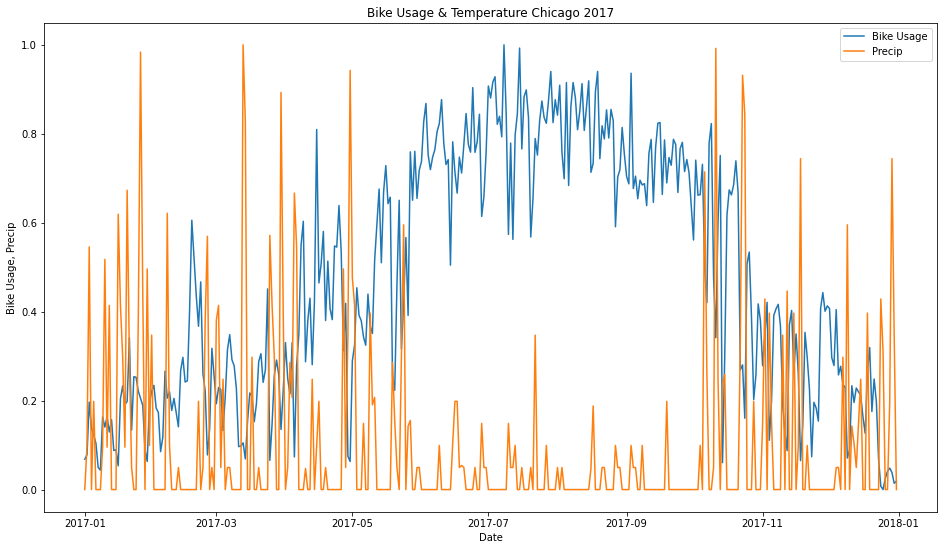

In [149]:
fig, ax = plt.subplots(figsize = (16,9))

chicago_weather_precip_daily_rescaled = (chicago_weather_precip_daily-chicago_weather_precip_daily.min())/(chicago_weather_precip_daily.max()-chicago_weather_precip_daily.min())

ax.plot(chicago_data_Date_avail_rescaled, label='Bike Usage')
ax.plot(chicago_weather_precip_daily_rescaled, label='Precip')

ax.set_title('Bike Usage & Temperature Chicago 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Bike Usage, Precip')
ax.legend()

plt.show()

# Duration Rentals

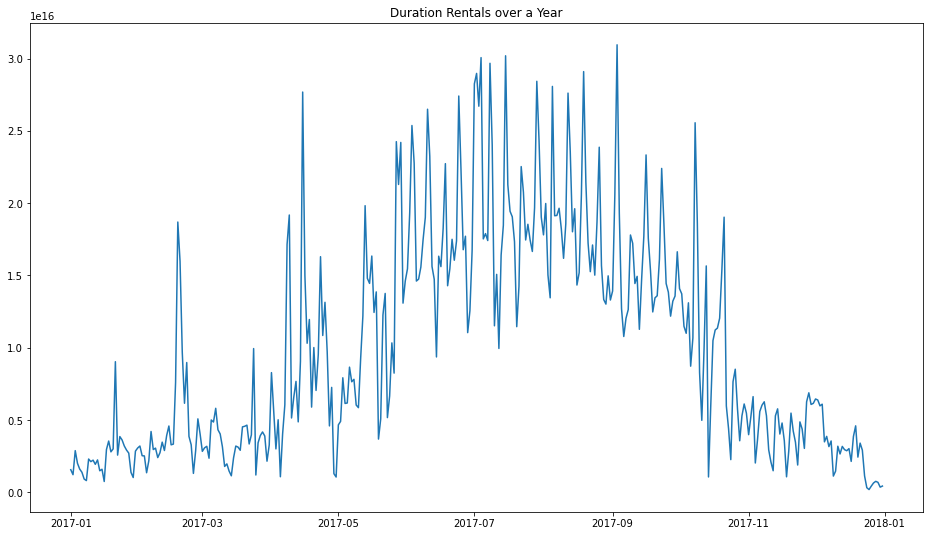

In [134]:
chicago_data_Date_duration = chicago_data.groupby('Date')['travel_delta'].sum()
chicago_data_Date_duration = pd.DataFrame(chicago_data_Date_duration)

fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_Date_duration)

ax.set_title('Duration Rentals over a Year')
plt.show()

In [144]:
chicago_data['duration'] = chicago_data['time_delta'].dt.total_seconds()
chicago_data_Weekday_duration = chicago_data.groupby(['Date', 'Weekday'])[duration].mean()
chicago_data_Weekday_duration = pd.DataFrame(chicago_data_Weekday_duration)

fig, ax = plt.subplots(figsize = (16,9))

sns.boxplot(x = chicago_data_Weekday_duration.index.get_level_values('Weekday'), y =chicago_data_Weekday_duration['travel_delta'], ax = ax)

ax.set_title('Duration Rentals per Weekday')
plt.show()

NameError: name 'duration' is not defined

# Stations

In [25]:
all_stations = (chicago_data['start_station_name'].append(chicago_data['end_station_name'])).unique()
number_stations = len(all_stations)

print("The overall number of stations is {}".format(number_stations))


The overall number of stations is 593


In [60]:
chicago_heat_map = folium.Map(location=(41.8781136, -87.6297982), tiles='Stamen Terrain', zoom_start = 10,
                             control_scale= True, max_zoom= 20)

#chicago_heat_map.add_child(plugins.HeatMap(chicago_data['start_station_name'], radius = 20))
chicago_heat_map